<div style="background:#FFFFEE; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFQ619 - Data Analytics for Strategic Decision Makers (2024)</div>

# IFQ619 :: UA1 - Assignment 1 - Foundational techniques (40%)

**IMPORTANT:** Refer to the instructions in Canvas module [UA1 - Assignment 1]() *BEFORE* working on this assignment. Ensure that you are familiar with the marking rubric and understand how the grade for this assignment will be awarded according to the criteria.

1. Complete and run the code cell below to display your name and student number
2. Complete all questions in Part A (within 2 weeks) - you can get assistance from your tutor with this part.
3. Ensure that your tutor has verified your understanding of your work in Part A (no later than week 5)
4. Complete a full analysis for Part B. Ensure that you use the techniques and libraries/packages that have been used in class.
5. Submit your final notebook on Canvas [UA1 - Assignment 1]()


In [29]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import HTML

first_name = "Morgan"
last_name = "Meeuwissen"
student_number = "n12240800"

personal_header = f"<h1>{first_name} {last_name} ({student_number})</h1>"
HTML(personal_header)

---

## Data for both Part A and Part B

This assignment uses data from the Queensland Government [Open Data Portal](https://www.data.qld.gov.au). Both parts will use data on [Advance Queensland Funding Recipients](https://www.data.qld.gov.au/dataset/advance-queensland-funding-recipients). You should familiarise yourself with the [Advance Queensland Program and Grants](https://advance.qld.gov.au) to understand the context for the data. You should also refer to the `field descriptions` metadata to better understand the fields that are relevant to the `funding recipients` data.

---
## Part A

**IMPORTANT** For the following task, keep a record of the dates and times where you demonstrated your understanding with your tutor. These should be AFTER you have completed the questions, and BEFORE week 5.

### [Q1] Read the data

- Open the CSV version of the file. Open directly from the URL into a pandas dataframe.
- Identify an appropriate index, and make a note of the columns.

In [30]:
# Import Libraries for later use
import pandas as pd
import plotly.express as px

While retrieving the data from the [Queensland Government Open Data Portal](https://advance.qld.gov.au) (2024) there were issues experienced with the encoding of the dataset as it was not in the expected utf-8 encoding. Unable to find answers from the portal, the encoding was instead identified using [Abc File Encoding Detector](https://abctool.gitlab.io/encoding-detector/) (n.d.) as another common encoding variant: **'windows-1252'**.

First look at the fields that are available:

In [31]:
# Retrieve both the fields
fields_url = "https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/e4d8e24c-3e2b-41df-860f-9c292209d021/download/advance-queensland-funding-recipients-field-descriptions.csv"

fields_df = pd.read_csv(fields_url, encoding = 'windows-1252')
fields_df

,Header,Description,Field Type
0,Program,Name of Advance Queensland Program.,text
1,Round,The program's funding round in which the recipient was successful.,text
2,Recipient Name,Name of the primary successful applicant that received the funding/AQ opportunity - as set out on the original application/entry/response.,text
3,Physical Address of Recipient - Suburb/Location,Suburb or town of the recipient's address.,text
4,Physical Address of Recipient - Post Code,Postcode of the recipient's address.\n,number
5,University Collaborator (if applicable),The name of the university(ies) that collaborate with the main recipient of the AQ funding to support delivery of the agreed project deliverables.,text
6,Other Partners | Collaborators (if applicable),The name of the body(ies) other than universities [including individuals and business entities] that will collaborate with the main recipient of the AQ funding to support delivery of the agreed project deliverables.,text
7,Investment/Project Title,Brief title of the activity for which the recipient is receiving funding or benefit.,text
8,Primary Location of Activity/Project - Suburb,Suburb or Town of the recipient's project.\n,text
9,Primary Location of Activity/Project - Post Code,Postcode of the recipient's project.\n,number


None of these appear to be an ID field appropriate to use as a unique index, so we will need to retrieve the data and confirm if there is any appropriate ID. It is likely only the text fields are appropriate, but I find the "Program", "Round", and "Recipient Name" to be the most likely.

In [32]:
# Retrieve the dataset and view the top
data_url = "https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/0f97b985-f5c7-49d2-8b0a-bc5dfbe070b9/download/advance-queensland-funding-recipients.csv"
data_df = pd.read_csv(data_url, encoding = 'windows-1252')
data_df.head(10)

,Program Name,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners/ Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb/Location,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project,Approval date,Local Government Area (LGA),RAP Region (based on Project Location),State Electorate,Contractual Commitment (GST excl.)
0,Aboriginal and Torres Strait Islander PhD Scholarships,AQ Aboriginal & Torres Strait Islander PhD Scholarships 2018-19 Round 4,Central Queensland University,Norman Gardens,4701.0,NaN,BHP Billiton,Decolonising the systematic barriers and enablers of Indigenous career progression in MiningCo (BHP). An Aboriginal perspective - Terry Bell,Brisbane City,4001.0,NaN,14/06/2019 0:00,Rockhampton (R),Brisbane and Redlands,Keppel,"$107,084"
1,Aboriginal and Torres Strait Islander PhD Scholarships,AQ Aboriginal & Torres Strait Islander PhD Scholarships 2015-16 Round 1,Griffith University,Nathan,4111.0,NaN,NaN,An indigenous journey through the 21st century educational landscapes of new metrics - Troy Meston,Nathan,4111.0,NaN,28/01/2016 0:00,Brisbane (C),Brisbane and Redlands,Toohey,"$117,500"
2,Aboriginal and Torres Strait Islander Research Fellowships,AQ Aboriginal & Torres Strait Islander Research Fellowships 2015-16 Round 1,CSIRO,Smithfield,4878.0,NaN,CSIRO,Transforming hidden data: An integrative information system for Torres Strait - Cass Hunter,Smithfield,4878.0,NaN,28/01/2016 0:00,Cairns (R),Far North Queensland,Barron River,"$158,032"
3,Aboriginal and Torres Strait Islander Research Fellowships,AQ Aboriginal & Torres Strait Islander Research Fellowships 2017-18 Round 3,Queensland University of Technology,Brisbane City,4000.0,NaN,Engineered Wood Products Association Australasia Ltd,An Innovative Framing System for Taller Timber-Framed Buildings – Craig Cowled,Brisbane City,4000.0,NaN,21/08/2018 0:00,Brisbane (C),Brisbane and Redlands,McConnel,"$240,000"
4,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Central Highlands Development Corporation Limited,Emerald,4720.0,NaN,Central Queensland University (CQUniversity Australia) \n Rural Business Collective Pty Ltd \n C-Res (Qld) Pty Ltd \n BHP Billiton Limited \n Central Highlands Regional Council,Building and Bridging the Region’s New Economy,Emerald,4720.0,"Theodore, Tieri",28/08/2017 0:00,Central Highlands (R),Central Queensland,Gregory,"$500,000"
5,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Central Western Queensland Remote Area Planning And Development Board,Longreach,4730.0,NaN,Price Waterhouse Coopers \n Queensland University Of Technology \n Education Queensland \n University of Southern Queensland (Institute of Resilient Regions) \n The Outback Queensland Tourism Association Inc \n Local Government Association of Queensland \n Mckinlay Shire Council \n South West Regional Economic Development Association \n James Cook University - Townsville Campus - Master \n Central Queensland University - Rockhampton Campus - Master \n GWI Pty Ltd \n Telstra Corporation Limited,Outback Queensland Collaborative Innovation Project,Longreach,4730.0,"Cunnamulla, Julia Creek",13/06/2017 0:00,Longreach (R),Outback Queensland,Gregory,"$487,248"
6,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,GHD Pty Ltd,Townsville,4810.0,NaN,Townsville Chamber of Commerce \n Charters Towers Regional Council \n Palm Island Aboriginal Shire Council \n Townsville City Council \n Burdekin Shire Council,I-TAP North Queensland,Townsville City,4810.0,"Charters Towers, Ayr, Ingham",26/09/2017 0:00,Townsville (C),Townsville,Townsville,"$74,000"
7,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Gold Coast Innovation Hub Limited,Varsity Lakes,4227.0,NaN,42 Innovations Pty L

Based upon looking at the top 10 rows of the dataset shown above it can be seen that "Program Name" and "Round" aren't unique. In fact based upon some experimentation I have found even "Program Name", "Round", "Recipient Name", and "Investment/Project Title", and "Approval date" still wouldn't be unique. 

I will settle for "Program Name" for this demonstration though as I believe using too many columns would be excessive and overconstrain the index.

In [33]:
# Set the index
data_df.set_index("Program Name", inplace = True)

print(f"This returns a uniqueness check of the index as: {data_df.index.is_unique}. This should be used with caution going forward to avoid issues such as cartesian joins in merges or selecting more rows than expected.")

This returns a uniqueness check of the index as: False. This should be used with caution going forward to avoid issues such as cartesian joins in merges or selecting more rows than expected.


### [Q2] Group the data
- Choose at least one category and group the data
- Obtain an appropriate aggregate for the groups (e.g. Sum, Mean, etc)

My intent is to group by the LGA and compare total contractural commitments to check how even the distribuition is.

Before continuing on with the analysis it is also wise to ensure the dataframe columns are in the appropriate datatypes and then rectify this. The following is what they have been read in from the csv and I will want to see the Contractual Commitment as a numeric.

In [35]:
data_df.dtypes

Round                                                      object
Recipient Name                                             object
Physical Address of Recipient - Suburb/Location            object
Physical Address of Recipient - Post Code                 float64
University Collaborator (if applicable)                    object
Other Partners/ Collaborators (if applicable)              object
Investment/Project Title                                   object
Primary Location of Activity/Project - Suburb/Location     object
Primary Location of Activity/Project - Post Code          float64
Multiple Locations of Activity/Project                     object
Approval date                                              object
Local Government Area (LGA)                                object
RAP Region (based on Project Location)                     object
State Electorate                                           object
Contractual Commitment (GST excl.)                         object
dtype: obj

In [36]:
#Clean the data we are interested in and convert to numeric
data_df["Contractual Commitment ($ GST excl.)"] = pd.to_numeric(data_df["Contractual Commitment (GST excl.)"].str.replace('(\D+)', "", regex = True)) # This regex removes all non-numeric characters
# Create the grouped series of aggregated contractural agreements
grouped_data = data_df.groupby("Local Government Area (LGA)")["Contractual Commitment ($ GST excl.)"].sum()
grouped_data

Local Government Area (LGA)
Aurukun (S)                  25000
Blackall-Tambo (R)           84219
Brisbane (C)             158947003
Bulloo (S)                   99964
Bundaberg (R)              1078859
Burdekin (S)                196600
Cairns (R)                 3606310
Cassowary Coast (R)         242400
Central Highlands (R)      1181399
Charters Towers (R)          21600
Cherbourg (S)               195391
Cook (S)                      9680
Douglas (S)                  12830
Fraser Coast (R)            128533
Gladstone (R)               587290
Gold Coast (C)            12618683
Goondiwindi (R)             922180
Gympie (R)                  723330
Hinchinbrook (S)             17636
Ipswich (C)                2974094
Livingstone (S)              75000
Lockyer Valley (R)          777730
Logan (C)                  2019274
Longreach (R)               597348
Mackay (R)                 1388737
Maranoa (R)                  80000
Mareeba (S)                  98080
Moreton Bay (R)            

### [Q3] Save the data
- Transform your grouped data into a dataframe
- Save the dataframe as a CSV file


In [8]:
# Your answer here
grouped_df = grouped_data.reset_index()

# Change the column names
grouped_df.rename(columns={"Contractual Commitment ($ GST excl.)": "Total Contractual Commitment ($ GST excl.)"}, inplace=True)

# Save it to a csv in the data folder
grouped_df.to_csv("../data/assignment1_total_contractual_commitments.csv", index=False)

### [Q4] Visualise the data
	
- Visualise the grouped data with an appropriate chart
- Ensure X and Y axes are labelled appropriately
- Add an appropriate title for the chart

Using a bar chart allows for easy visualisation of aggregates such as the Total Contractual Commitment as the grouping by Local Government Area is a discrete variable. Additionally by sorting the values we can easily compare the relative size and rankings of the Total Contractual Commitment.

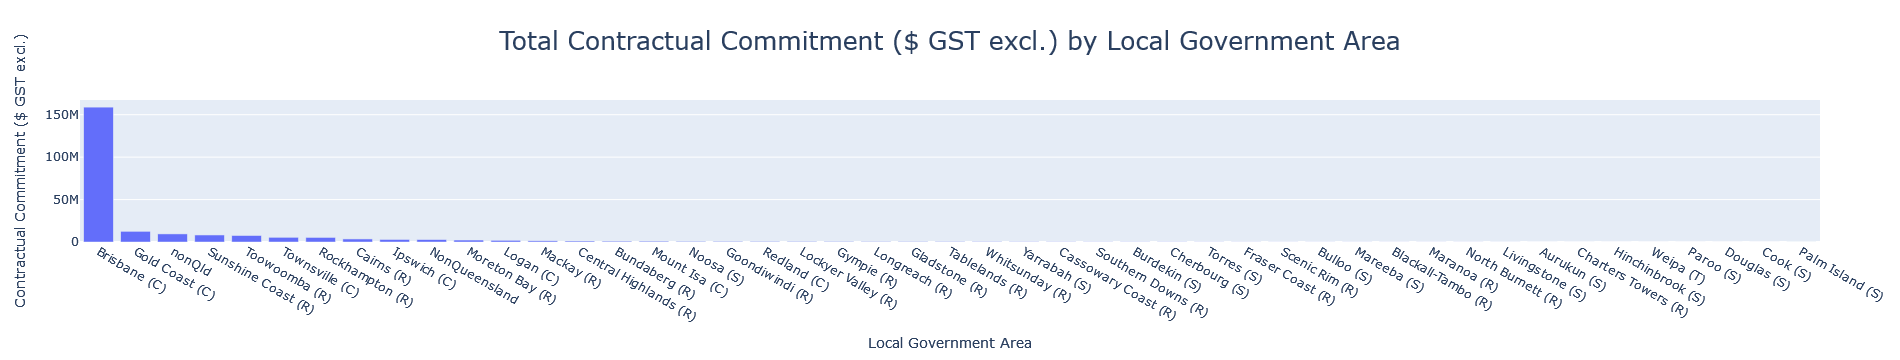

In [37]:
# Your answer here
commitments_fig = px.bar(grouped_df.sort_values("Total Contractual Commitment ($ GST excl.)", ascending = False),
       x = "Local Government Area (LGA)",
       y ="Total Contractual Commitment ($ GST excl.)",
       title = "Total Contractual Commitment ($ GST excl.) by Local Government Area",
       labels = {"Local Government Area (LGA)": "Local Government Area", 
                 "Total Contractual Commitment ($ GST excl.)": "Contractual Commitment ($ GST excl.)"})

commitments_fig.update_layout(
    title_font_size=25,
    title_x=0.5,
    legend_title_font_size=15,
    height=750
)

### [Q5] Create new dataframes
- Select 2 groups from a particular category and filter the data into 2 separate dataframes
- For each dataframe group by at least one logical category with meaningful aggregates

Selecting two different Programs "Ignite Ideas Fund" and "Knowledge Transfer Partnerships" as the overall groups to compare as dataframes and creating secondary groups within these by the year the funding was approved.

In [10]:
# Your answer here
ignite_df = data_df.loc["Ignite Ideas Fund"].reset_index()
ignite_df["Approval Year"] = pd.to_datetime(ignite_df["Approval date"], format="%d/%m/%Y %H:%M").dt.year
mean_ignite_df = ignite_df.groupby("Approval Year")["Contractual Commitment ($ GST excl.)"].mean().reset_index()
mean_ignite_df.rename(columns={mean_ignite_df.columns[1]: "Mean Contractual Commitment ($ GST excl.)"}, inplace=True)
print("Ignite Ideas Fund") 
mean_ignite_df

Ignite Ideas Fund


,Approval Year,Mean Contractual Commitment ($ GST excl.)
0,2016,140244.236842
1,2017,122976.658385
2,2018,112004.342857
3,2019,120906.403846
4,2020,117525.651163
5,2021,105390.714286
6,2022,114149.227273
7,2023,113437.750000
8,2024,113422.095238


In [11]:
knowl_df = data_df.loc["Knowledge Transfer Partnerships"].reset_index()
knowl_df["Approval Year"] = pd.to_datetime(knowl_df["Approval date"], format="%d/%m/%Y %H:%M").dt.year
mean_knowl_df = knowl_df.groupby("Approval Year")["Contractual Commitment ($ GST excl.)"].mean().reset_index()
mean_knowl_df.rename(columns={mean_knowl_df.columns[1]: "Mean Contractual Commitment ($ GST excl.)"}, inplace=True)
mean_knowl_df

,Approval Year,Mean Contractual Commitment ($ GST excl.)
0,2015,24660.000000
1,2016,25017.516129
2,2017,26550.325000
3,2018,25757.400000


### [Q6] Obtain descriptive statistics
	
- Find the descriptive statistics for the funds committed for the different groups.
- Assign the `count`, `mean`, `min`, and `max` to variables. Round the mean to a reasonable precision.
- Use the variables to create a string which describes in words the basic descriptive statistics of the committed funds.
- Print the constructed strings for each group

In [12]:
# Your answer here
ignite_stats_df = ignite_df.describe()
(ignite_count, ignite_mean, ignite_min, ignite_max) = ignite_stats_df["Contractual Commitment ($ GST excl.)"][["count", "mean", "min", "max"]]
ignite_mean = round(ignite_mean, 2)

knowl_stats_df = knowl_df.describe()
(knowl_count, knowl_mean, knowl_min, knowl_max) = knowl_stats_df["Contractual Commitment ($ GST excl.)"][["count", "mean", "min", "max"]]
knowl_mean = round(knowl_mean, 2)

ignite_stat_str = f"Out of the {ignite_count:.0f} grants allocated as part of the Ignite Ideas Fund the average grant was ${ignite_mean:,.2f}, which ranged between ${ignite_min:,.2f} and ${ignite_max:,.2f}.\n"
print(ignite_stat_str)

knowl_stat_str = f"Out of the {knowl_count:.0f} grants allocated by Knowledge Transfer Partnerships the average grant was ${knowl_mean:,.2f}, which ranged between ${knowl_min:,.2f} and ${knowl_max:,.2f}.\n"
print(knowl_stat_str)

Out of the 440 grants allocated as part of the Ignite Ideas Fund the average grant was $119,948.11, which ranged between $23,397.00 and $250,000.00.

Out of the 154 grants allocated by Knowledge Transfer Partnerships the average grant was $25,366.19, which ranged between $900.00 and $50,000.00.



Generally speaking it is clear that the Ignite Ideas fund has provided more individual grants and an average higher level of funding even when they were running over the same time period. However, this comparison does not take into account other factors such as they likely had different target purposes and audiences. 

### [Q7] Visualise the data

- Using the plotly library, create histograms of the committed funds for the different groups
- Set the number of bins to an appropriate value
- Display the actual counts in the bars
- Enhance the visualisation of the variance by including a box plot
- Use suitable colours and add appropriate textual information

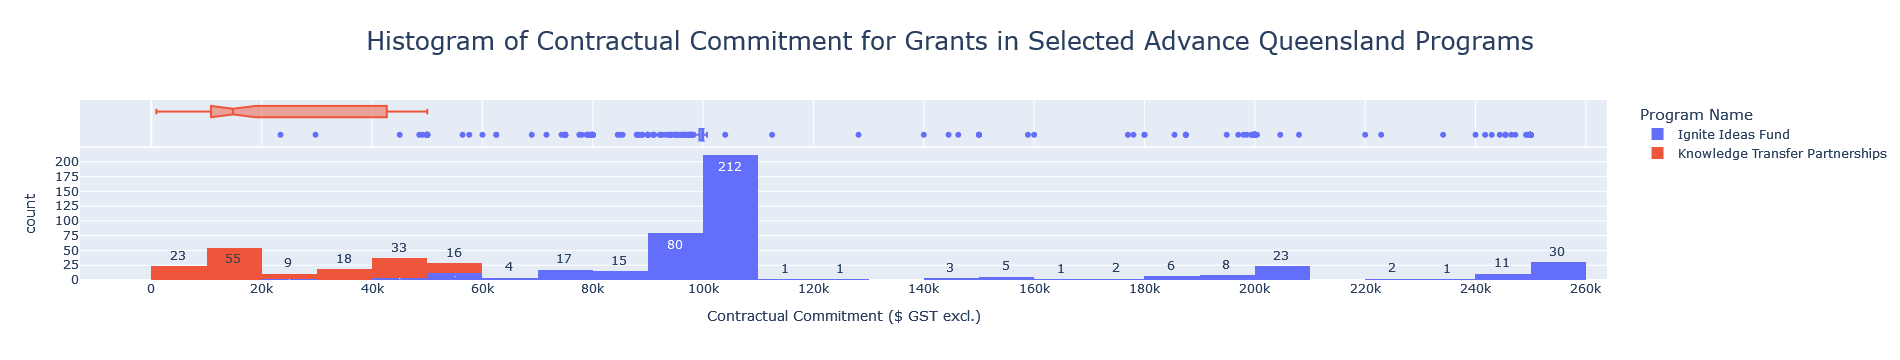

In [38]:
# Your answer here
# Looks like concat serves the same purpose as rbind in R
plot_df = pd.concat([ignite_df, knowl_df])

#Set up the histogram
plot7_fig = px.histogram(plot_df, x ="Contractual Commitment ($ GST excl.)", 
                         nbins = 40, 
                         color = "Program Name",
                         marginal="box",
                         text_auto=True,
                         title = "Histogram of Contractual Commitment for Grants in Selected Advance Queensland Programs")
#Update the labels formatting
plot7_fig.update_layout(
    title_font_size=25,
    title_x=0.5,
    legend_title_font_size=15,
    height=500
)
#Update the axes
plot7_fig.update_xaxes(tick0=0, dtick=20000)
plot7_fig.update_yaxes(dtick=25)
plot7_fig.show()

Setting the number of bins to 40 is appropriate as this buckets the Contractual Commitments into $10k ranges and provides sufficicent resolution to both groups despite them having different distribuitons.

### Part A References

AbcTool.info. (n.d). _Abc File Encoding Detector_.

    https://abctool.gitlab.io/encoding-detector/

Queensland Government Open Data Portal. (2024, July 1st) _Advance Queensland Funding Recipients_.

    Retrieved August 12, 2024, from https://www.data.qld.gov.au/dataset/advance-queensland-funding-recipients

---
## Part B - creating a narrative to answer significant questions

**SCENARIO:**  The allocation of public money (obtained from the public via taxes) is a politically sensitive activity with governments regularly coming under scrutiny for how this money is spent. A respected media organisation is looking into the Queensland Government's Advance Queensland program. The resulting story could be a "good news" story reporting on the success of the program, however if inappropriate spending or irregularities are found, it could become a story that is critical of the scheme, and potentially the Government.

As a data analyst, your task is to analyse the publicly available data on the distribution of the funds over time. You are looking for patterns that may support the "good news" story, or which may be a cause for concern. It is up to you how deeply you explore the data, but at a minimum you should look at (a) the balance between South-East Queensland and the remainder of the state (regional Queensland); and (b) how distributions align with the objectives of the scheme which may include supporting specified groups of people. 

**ETHICAL APPROACH:** You are expected to be fair and ethical in your analysis, and therefore the insights that you draw should take into account contextual factors. You should avoid simplistic assumptions like assuming all groups and activities should receive equal funding. For example, disproportionate funding may be appropriate due to social circumstances or the costs involved in a particular activity. Further, benefits to Queensland may come in different forms. For example, cultural benefits cannot be directly compared to economic benefits.

**ESSENTIAL REQUIREMENTS:** Your task as a data analyst is to:

- Ensure that you use the techniques and libraries/packages that have been used in class
- Identify high quality questions that when answered may be helpful in addressing the scenario above
- Obtain the data in JSON form from the API.
- Clean and filter the data as appropriate
- Analyse the data in a way that answers your questions and ultimately addresses the concern in the scenario
- Visualise your results in a meaningful way that is helpful in making visible key findings
- Provide a detailed summary of the insights found and how they address the original questions and scenario

**AUTHENTICITY AND INTEGRITY**: You will be marked on (a) *HOW* you undertake the task todgether; with (b) detail of *WHY* you made various decisions involved in the tasks; and (c) acknowledgement of **WHERE** you  used material that is not directly yours. Therefore, you must document your thinking and approach throughout the notebook using the Markdown cells, and give credit to other resources as appropriate. You are encouraged to use the `Exemplars` PDF to help write your code. You may use online resources including `GenAI tools` and `stackoverflow` to help you write your code, however you must acknowledge that you are using these resources in the markdown cells explaining your analysis. Note that you do not need to use formal referencing for this.

---


<<<< INSERT CELLS BELOW >>>>







# Analysing Fund Allocation Patterns for Advance Queensland
### Morgan Meeuwissen 2024

## **Context**
Advance Queensland is a government initiative designed to support and drive innovation across the state by providing funding, resources, and support to startups, entrepreneurs, and research organizations. As a data analyst for a respected media company I am interested in identifying newsworthy patterns or irregularities in the allocation of funds by the intiative as a whole rather than individual programs, but with particularly focus between cities and regional areas.

In [14]:
# Import Libraries for later use
import pandas as pd
import plotly.express as px

# Change pandas settings to ensure full dataframe columns display
pd.set_option('display.max_colwidth', 1000)

## **Question 1**

> What proportion of funding has Advance Queensland allocated to city and regional recipients over recent years? Has this been fairly distribuited?

## **Data 1**
Data is being sourced from the Queensland Government's [Open Data Portal](https://www.data.qld.gov.au) to ensure that it is reliable source, however will also be filtered to the **five year period between 2019-2023** to ensure that it is of current interest to readers and that data only covers complete calendar years.

The following fields are available from the [Advance Queensland Funding Recipients](https://www.data.qld.gov.au/dataset/advance-queensland-funding-recipients):

In [15]:
# Retrieve field information
fields_url = "https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/e4d8e24c-3e2b-41df-860f-9c292209d021/download/advance-queensland-funding-recipients-field-descriptions.csv"
fields_df = pd.read_csv(fields_url, encoding = 'windows-1252') # Note dataset was found not be in in standard utf-8 

fields_df

,Header,Description,Field Type
0,Program,Name of Advance Queensland Program.,text
1,Round,The program's funding round in which the recipient was successful.,text
2,Recipient Name,Name of the primary successful applicant that received the funding/AQ opportunity - as set out on the original application/entry/response.,text
3,Physical Address of Recipient - Suburb/Location,Suburb or town of the recipient's address.,text
4,Physical Address of Recipient - Post Code,Postcode of the recipient's address.\n,number
5,University Collaborator (if applicable),The name of the university(ies) that collaborate with the main recipient of the AQ funding to support delivery of the agreed project deliverables.,text
6,Other Partners | Collaborators (if applicable),The name of the body(ies) other than universities [including individuals and business entities] that will collaborate with the main recipient of the AQ funding to support delivery of the agreed project deliverables.,text
7,Investment/Project Title,Brief title of the activity for which the recipient is receiving funding or benefit.,text
8,Primary Location of Activity/Project - Suburb,Suburb or Town of the recipient's project.\n,text
9,Primary Location of Activity/Project - Post Code,Postcode of the recipient's project.\n,number


This explanation of the fields comes in useful reviewing the top rows of the dataset itself:

In [16]:
# Retrieve the dataset and view the top 10 rows
data_url = "https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/0f97b985-f5c7-49d2-8b0a-bc5dfbe070b9/download/advance-queensland-funding-recipients.csv"
data_df = pd.read_csv(data_url, encoding = 'windows-1252')
data_df.head(5)

,Program Name,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners/ Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb/Location,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project,Approval date,Local Government Area (LGA),RAP Region (based on Project Location),State Electorate,Contractual Commitment (GST excl.)
0,Aboriginal and Torres Strait Islander PhD Scholarships,AQ Aboriginal & Torres Strait Islander PhD Scholarships 2018-19 Round 4,Central Queensland University,Norman Gardens,4701.0,NaN,BHP Billiton,Decolonising the systematic barriers and enablers of Indigenous career progression in MiningCo (BHP). An Aboriginal perspective - Terry Bell,Brisbane City,4001.0,NaN,14/06/2019 0:00,Rockhampton (R),Brisbane and Redlands,Keppel,"$107,084"
1,Aboriginal and Torres Strait Islander PhD Scholarships,AQ Aboriginal & Torres Strait Islander PhD Scholarships 2015-16 Round 1,Griffith University,Nathan,4111.0,NaN,NaN,An indigenous journey through the 21st century educational landscapes of new metrics - Troy Meston,Nathan,4111.0,NaN,28/01/2016 0:00,Brisbane (C),Brisbane and Redlands,Toohey,"$117,500"
2,Aboriginal and Torres Strait Islander Research Fellowships,AQ Aboriginal & Torres Strait Islander Research Fellowships 2015-16 Round 1,CSIRO,Smithfield,4878.0,NaN,CSIRO,Transforming hidden data: An integrative information system for Torres Strait - Cass Hunter,Smithfield,4878.0,NaN,28/01/2016 0:00,Cairns (R),Far North Queensland,Barron River,"$158,032"
3,Aboriginal and Torres Strait Islander Research Fellowships,AQ Aboriginal & Torres Strait Islander Research Fellowships 2017-18 Round 3,Queensland University of Technology,Brisbane City,4000.0,NaN,Engineered Wood Products Association Australasia Ltd,An Innovative Framing System for Taller Timber-Framed Buildings – Craig Cowled,Brisbane City,4000.0,NaN,21/08/2018 0:00,Brisbane (C),Brisbane and Redlands,McConnel,"$240,000"
4,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Central Highlands Development Corporation Limited,Emerald,4720.0,NaN,Central Queensland University (CQUniversity Australia) \n Rural Business Collective Pty Ltd \n C-Res (Qld) Pty Ltd \n BHP Billiton Limited \n Central Highlands Regional Council,Building and Bridging the Region’s New Economy,Emerald,4720.0,"Theodore, Tieri",28/08/2017 0:00,Central Highlands (R),Central Queensland,Gregory,"$500,000"


Out of these the following fields are of the most interest in answering the questions that have been set: "Program Name", "Approval date", "Contractual Commitment (GST excl.)", and "Local Government Area (LGA)". This last field is of interest as according to the [Australian Bureuu of Statistics](https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/1270.0.55.003~July%202016~Main%20Features~Local%20Government%20Areas%20(LGA)~7) the suffix on the LGA indicates its status as City/Regional.


It is also worth noting for later review of insights that there is a mixture of fields for recipient location and project location, so by using the recipient's LGA it leaves the possibility that the project was conducted elsewhere. **There is an assumption being made here that the recipient location benefits from the funding.**

Next steps in the code will be:
* Calculate a new column for the "LGA Status" as either Cities (C) or Regional Councils (R)
* Clean the "Approval date" and "Contractual Commitment (GST excl.)" to appropriate datatypes to facilitate further analysis
* Filter to only rows with a valid "LGA Status" and from 2019-2023 to ensure five complete years of data is available
* Set the "LGA Status" as an index so the groups can be accessed easily

In [17]:
# Add LGA Status Row (And implicit filter)
# There is probably a better way to add a new column with an if statement, but I am going to stick to the limits of my python knowledge and it will filter at the same time
city_df = data_df[data_df["Local Government Area (LGA)"].str.contains("\(C\)")].copy() # Had to go educate myself anyway on copys and views in pandas here
city_df.loc[:, "LGA Status"] = "Cities"
regional_df = data_df[data_df["Local Government Area (LGA)"].str.contains("\(R\)")].copy()
regional_df["LGA Status"] = "Regional Councils"
cleaned_df = pd.concat([city_df, regional_df])

# Convert Types
cleaned_df["Contractual Commitment ($ GST excl.)"] = pd.to_numeric(cleaned_df["Contractual Commitment (GST excl.)"].str.replace('(\D+)', "", regex = True))
cleaned_df["Approval Date"] = pd.to_datetime(cleaned_df["Approval date"], format="%d/%m/%Y %H:%M", errors = "coerce") # Some of the dates seem to be in epoch, but not many so will just force it through and convert to integer
cleaned_df["Approval Year"] = cleaned_df["Approval Date"].dt.year.convert_dtypes()
total_rows = cleaned_df["Approval Year"].count()
dt_error_rows = cleaned_df["Approval Year"].isna().sum()

# Filter to selected years
cleaned_df = cleaned_df[cleaned_df["Approval Year"].isin([2019,2020,2021,2022,2023])]
print(f"Note that {dt_error_rows} out of the total {total_rows} funding records for regional councils and cities didn't have a valid date and so was excluded from further analysis. This was possibly in an epoch timestamp, but correcting it was beyond my abilities.")

# Unselect raw columns that were transformed and sort data
cleaned_df = cleaned_df.drop(["Contractual Commitment (GST excl.)", "Approval date"], axis=1).sort_values(by="Approval Year")

# Set the index
cleaned_df.set_index("LGA Status", inplace = True)

Note that 1 out of the total 1292 funding records for regional councils and cities didn't have a valid date and so was excluded from further analysis. This was possibly in an epoch timestamp, but correcting it was beyond my abilities.


## **Analysis 1**

Investigate across the regional and city groups to see how the grants allocated over the five year compare in total number, average amount, maximums, and standard deviation

In [18]:
# Assign aggregate statistics to variables and use in a summary string
(regional_count, regional_mean, regional_std) = cleaned_df.loc["Regional Councils"].describe()["Contractual Commitment ($ GST excl.)"][["count", "mean", "std"]]
regional_stat_str = f"Out of the total ${regional_count*regional_mean:,.2f} supplied to regional recipients across {regional_count:.0f} grants, the average grant was ${regional_mean:,.2f} with a standard deviation of ${regional_std:,.2f}\n"
print(regional_stat_str)

(city_count, city_mean, city_std) = cleaned_df.loc["Cities"].describe()["Contractual Commitment ($ GST excl.)"][["count", "mean", "std"]]
city_stat_str = f"Out of the total ${city_count*city_mean:,.2f} supplied to city recipients across {city_count:.0f} grants, the average grant was ${city_mean:,.2f} with a standard deviation of ${city_std:,.2f}\n"
print(city_stat_str)

# Generate a comparison string that uses some calculation
compare_str = f"Comparatively regional councils recieved {regional_count/(city_count+regional_count):.1%} of the total number of grants, but only {regional_count*regional_mean/(city_count*city_mean+regional_count*regional_mean):.1%} of the total funding due to having {1-regional_mean/city_mean:.2%} lower grants on average compared to city recipients."
print(compare_str)

Out of the total $16,059,887.00 supplied to regional recipients across 97 grants, the average grant was $165,565.85 with a standard deviation of $407,428.54

Out of the total $60,727,648.00 supplied to city recipients across 297 grants, the average grant was $204,470.20 with a standard deviation of $593,064.43

Comparatively regional councils recieved 24.6% of the total number of grants, but only 20.9% of the total funding due to having 19.03% lower grants on average compared to city recipients.


## **Visualisation 1**
Using a pie pie chart to re-interate the above funding distribuitions to give a more intuitive understanding of the funding ratio allocated to regional and city recipients.

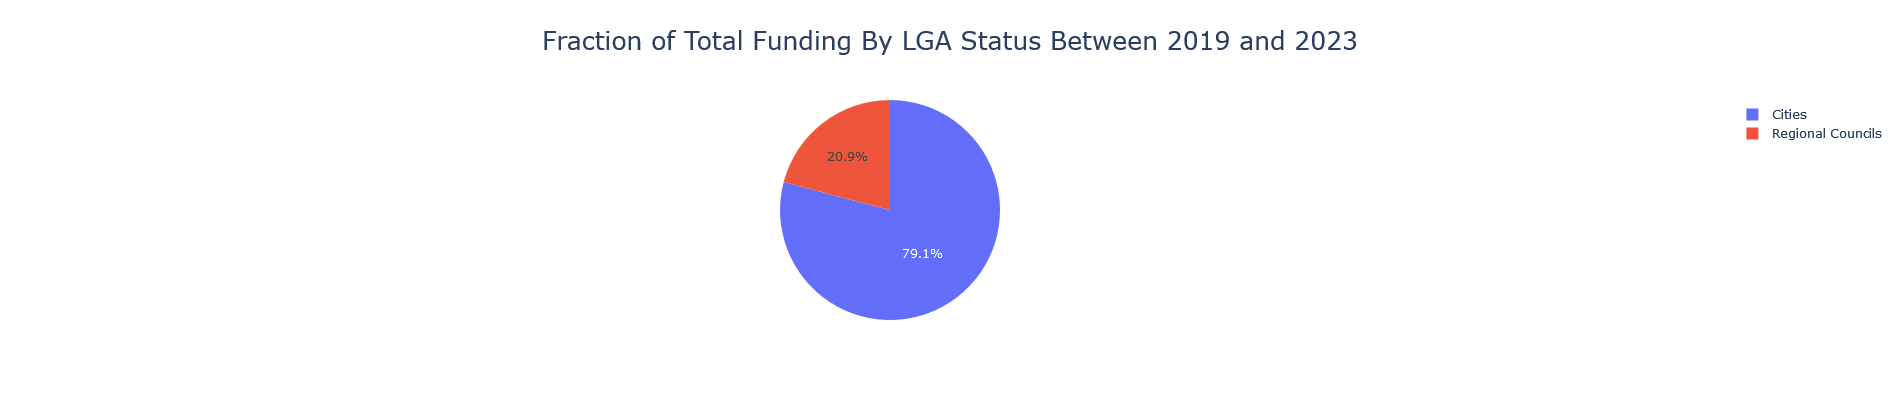

In [42]:
# produce pi chart from existing data
part_b_pi = px.pie(cleaned_df.reset_index(), 
                   values="Contractual Commitment ($ GST excl.)", 
                   names="LGA Status",
                   title = "Fraction of Total Funding By LGA Status Between 2019 and 2023")
part_b_pi.update_layout(
    title_font_size=25,
    title_x=0.5,
    legend_title_font_size=15,
    height=400,
    width = 1000
)

part_b_pi.show(align="center")

## **Insight 1**

> What proportion of funding has Advance Queensland allocated to city and regional recipients over recent years? Has this been fairly distribuited?

The investigation has shown Advance Queensland has invested substantially more total funding to recipients within cities when compared to regional councils (Approximately quadruple). It must be noted though that the analysis so far has taken quite a high level view of the funding distribuition for the entire Advance Queensland initiative and has not taken into account the purpose of individual programs, population size, or that there appear to be significant outliers that may have been driven by external factors. It is not appropriate to draw any newsworthy conclusions on the investigation so far, so **we will need to refine the analysis to normalise for the population size to judge if the distribuition is fair**.


Additionally it would be very unusual to see such large standard deviations compared to the mean in homogenuous groups, but with so many different programs being funded by Advance Australia it is not too surprising. Considering that grants cannot be negative and the relative size of the standard deviation compared to the mean, it can be infered that there are some very large outliers in grant size for both groups. This gives rise to a new question for later analysis:

*What outlier grants exist and how much do they impact the funding allocations for city and regional recipients?*





## **Data 1b**

*Note that this is a continuation of Question 1*

Additional data about regional and city population sizes required to proceed with the intended analysis, however it appears that the [Estimated resident populations](https://www.qgso.qld.gov.au/issues/5496/estimated-resident-population-lga-qld-2001-2023p.csv) available from the [Queensland Government Statistician's Office page](https://www.qgso.qld.gov.au/statistics/theme/population/population-estimates/regions#current-release-estimated-resident-population) has been configured to prevent automated downloading. (The link also shows as broken on the Queensland Government Open Data Portal which has been taken as confirmation that there is likely some sort of anti-scraping measure in place).

For the purposes of continuing the investigation this data has been manually downloaded and transformed to sum the annual population totals for regional and city LGAs:

In [43]:
# Output of Excel Sumif
pop_df = pd.DataFrame({"Year": [2019, 2020, 2021, 2022, 2023], 
                       "City LGA Population": [3256513, 3311475, 3341289, 3413990, 3515461], 
                       "Regional Councils LGA Population": [1608265,1628719,1647929,1677941,1712553]})

pop_df.set_index("Year")

,City LGA Population,Regional Councils LGA Population
Year,,
2019,3256513,1608265
2020,3311475,1628719
2021,3341289,1647929
2022,3413990,1677941
2023,3515461,1712553


## **Analysis 1b**

As the population data is representative of the entire regional and city populations **it is only appropriate to normalise the grants when aggegated to the same groups.** This normalising cannot be used when looking at outliers or individual programs.

To ensure this alignment the grants need to be aggregated to the total funding by year and LGA status and then merged with the population numbers so that the funding per person can be calculated

In [21]:
# Find total funding sum by year and LGA status
yearly_funding_df = cleaned_df.reset_index().groupby(["LGA Status", "Approval Year"])["Contractual Commitment ($ GST excl.)"].sum().reset_index()
#Pivot the data to align layouts
yearly_funding_df = yearly_funding_df.pivot(index="Approval Year", columns="LGA Status", values="Contractual Commitment ($ GST excl.)")

# Merge the Dfs and normalise the funding by population
normalised_df = pd.merge(yearly_funding_df.reset_index(), pop_df, left_index=True,right_index=True)
normalised_df["City Recipient Funding Per Capita"] = round(normalised_df.loc[:, "Cities"]/normalised_df.loc[:, "City LGA Population"],2)
normalised_df["Regional Recipient Funding Per Capita"] = round(normalised_df.loc[:, "Regional Councils"]/normalised_df.loc[:, "Regional Councils LGA Population"],2)
#normalised_df = normalised_df[["Approval Year", "City Recipient Funding Per Capita", "Regional Recipient Funding Per Capita"]]
normalised_df[["Approval Year", "City Recipient Funding Per Capita", "Regional Recipient Funding Per Capita"]].set_index("Approval Year")

,City Recipient Funding Per Capita,Regional Recipient Funding Per Capita
Approval Year,,
2019,5.13,3.34
2020,7.27,3.04
2021,1.64,1.57
2022,2.30,1.00
2023,1.88,0.86


This table represents the total per capita funding ($/person) that the Advance Queensland allocated across all programs. Now that the data is normalised it is much more acceptable to perform comparisons across the regional and city recipient funding allocations.

## **Visualisation 1b**
Display the above results using a bar chart to give a more intuitive view of how the per capita funding is changing over time for the groups.

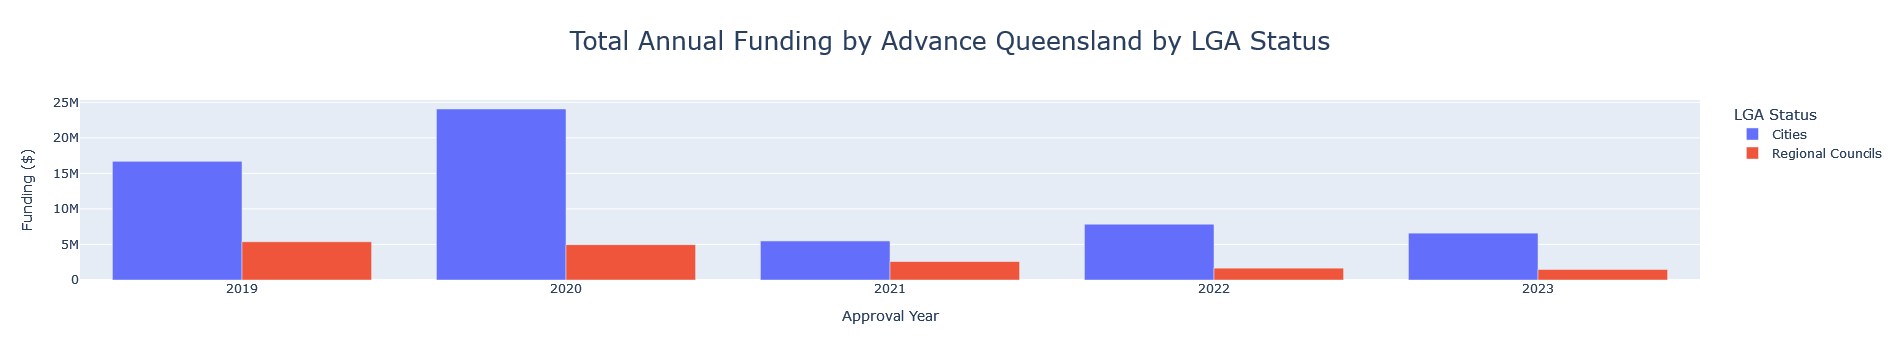

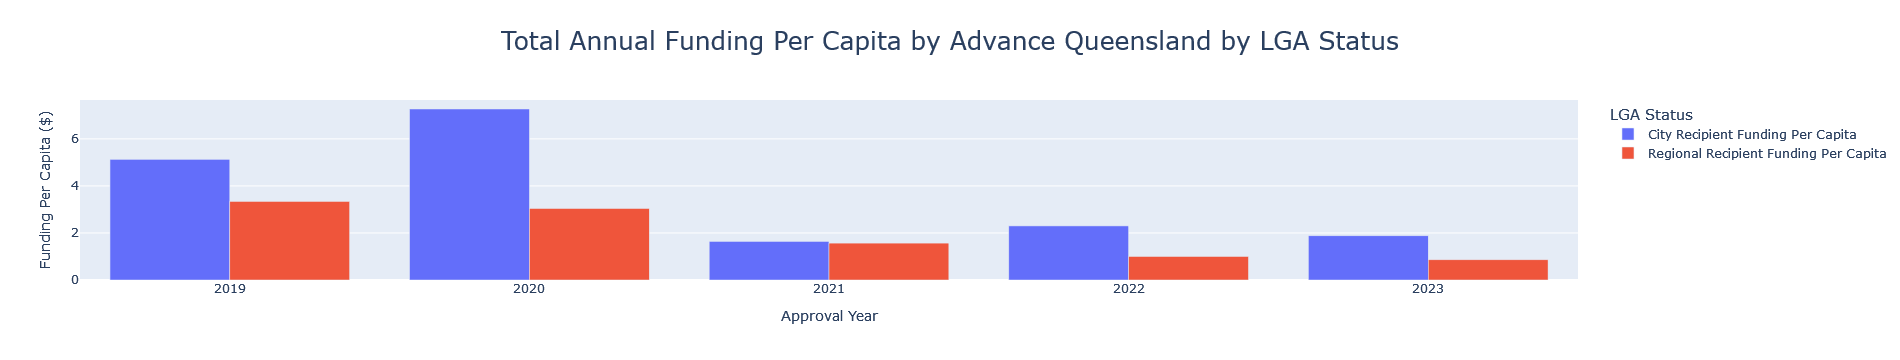

In [28]:
part_b_bar1 = px.bar(pd.melt(normalised_df, id_vars="Approval Year", value_vars = ["Cities", "Regional Councils"], value_name="Funding ($)"), 
                       x = "Approval Year", 
                       y="Funding ($)", 
                       color = "variable",
                       barmode = "group",
                       title = "Total Annual Funding by Advance Queensland by LGA Status",
                       labels={"variable": "LGA Status"})

part_b_bar1.update_layout(
    title_font_size=25,
    title_x=0.5,
    legend_title_font_size=15,
    height=500
)

part_b_bar2 = px.bar(pd.melt(normalised_df, id_vars="Approval Year", value_vars = ["City Recipient Funding Per Capita", "Regional Recipient Funding Per Capita"], value_name="Funding Per Capita ($)"), 
                       x = "Approval Year", 
                       y="Funding Per Capita ($)", 
                       color = "variable",
                       barmode = "group",
                       title = "Total Annual Funding Per Capita by Advance Queensland by LGA Status",
                       labels={"variable": "LGA Status"})

part_b_bar2.update_layout(
    title_font_size=25,
    title_x=0.5,
    legend_title_font_size=15,
    height=500
)

# Ideally I would have liked to have used a facet wrap here to display both as part of the same figure
part_b_bar1.show()
part_b_bar2.show()

## **Insight 1b**
> What proportion of funding has Advance Queensland allocated to city and regional recipients over recent years? Has this been fairly distribuited?

By following the inital insight that more total funding was indeed given to city recipients, this further analysis has done much to provide informative basis on which to assess the fairness of the funding distribuiton by normalising for population of regional and city areas. Compared to the initial finding that showed nearly four times the funding provided to city recipients over the entire four year period, the normalised total funding in the above chart shows that this is much closer on a per capita basis. Regardless both visualisations show a significant bias towards city recipients in both the Total Annual Funding and Total Annual Funding Per Capita that do seem indicative that that the distribuition may be unfair.

However, this approach is still susceptible to outliers and relies upon the assumption that recipients are located in the region that benefit from the grant. In order to evaluate if regional areas are being unfairly descriminated we would need to examine the outliers, have a much more detailed understanding of objectives of each program, and know what benefits each funded project was having.

---

## **Question 2**
Referring back to Insight 1 there was some discussion of the large standard deviation compared to the mean and how this indicated the presence of outliers. This led to the following question that will now be investigated:
> What outlier grants exist and how much do they impact the funding allocations for city and regional recipients?

## **Data 2**

No new source of data required. The same cleaned dataset from Question 1 will suffice. (without normalising to per capita as to investigate outliers individual grant amounts will need investigation.)

In [23]:
cleaned_df.head()

,Program Name,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners/ Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb/Location,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project,Local Government Area (LGA),RAP Region (based on Project Location),State Electorate,Contractual Commitment ($ GST excl.),Approval Date,Approval Year
LGA Status,,,,,,,,,,,,,,,,,
Cities,Ignite Ideas Fund,AQ Ignite Ideas Fund 2018-19 Round 5,Codestream Solutions Pty Ltd,Fortitude Valley,4006.0,NaN,NaN,FloodMapp - Predictive Flood Mapping,Fortitude Valley,4006.0,NaN,Brisbane (C),Brisbane and Redlands,McConnel,100000,2019-08-19,2019
Cities,Ignite Ideas Fund,AQ Ignite Ideas Fund 2018-19 Round 5,Core Resources Pty Ltd,Albion,4010.0,NaN,NaN,Toowong Process,Albion,4010.0,NaN,Brisbane (C),Brisbane and Redlands,Clayfield,200000,2019-08-19,2019
Regional Councils,Regional Startup Hubs Support Program,Regional Startup Hubs Support Program 17-18 Round 1,Bundaberg Enterprise Centre Association Inc,Bundaberg Central,4670.0,NaN,AT_Incubator \n AusIndustry,Startup Switchboard,Bundaberg Central,4670.0,"Bundaberg BEC - 20B Quay St, Bundaberg",Bundaberg (R),Wide Bay,Bundaberg,75000,2019-05-21,2019
Regional Councils,Regional Startup Hubs Support Program,Regional Startup Hubs Support Program 17-18 Round 1,Canvas Coworking Inc,Toowoomba City,4350.0,NaN,NaN,Canvas Coworking Inc Programs and Activities Support,Toowoomba City,4350.0,NaN,Toowoomba (R),Darling Downs,Toowoomba North,75000,2019-05-21,2019
Regional Councils,Regional Startup Hubs Support Program,Regional Startup Hubs Support Program 17-18 Round 1,CLS Ability Enterprises Ltd,Kalkie,4670.0,NaN,"Ms Stephanie Piper \n Regional Housing Limited \n Allied Health Centre \n Rosa Cattle Company \n Bundaberg Fruit & Vegetable Growers \n Central Queensland University \n LESS Industries \n TAFE Queensland (Bundaberg) Bundaberg Regional Council \n The Generator \n Ulton Financial Planning \n Tikkun Olam Makers (TOM Global - Head Office in Tel Aviv, Israel)",AT_Incubator: Hardware Entrepreneurship Program,Kalkie,4670.0,NaN,Bundaberg (R),Wide Bay,Bundaberg,75000,2019-05-21,2019


## **Analysis 2**
The fastest way to spot some of the largest individual grants is to to sort them as a table and view a selection:

In [24]:
# Sorting and only displaying relevant columns
cleaned_df[["Program Name", "Round", "Recipient Name", "Investment/Project Title", "Contractual Commitment ($ GST excl.)", "Approval Date"]].sort_values("Contractual Commitment ($ GST excl.)", ascending=False).head(10)


,Program Name,Round,Recipient Name,Investment/Project Title,Contractual Commitment ($ GST excl.),Approval Date
LGA Status,,,,,,
Cities,UQ - COVID-19 Vaccine,UQ - COVID-19 Vaccine,The University of Queensland,Rapid Acceleration of the UQ COVID-19 Vaccine Program,10000000,2020-04-16
Regional Councils,Agtech and Logistics Hub,NaN,Agrifood Connect Limited,Agtech and Logistics Hub,3000000,2020-09-25
Regional Councils,Rockhampton Technology and Innovation Centre,NaN,Central Queensland University,Rockhampton Advanced Technology and Innovation Centre,2800000,2019-12-12
Cities,Platform Technology Program,AQ Platform Technology Program 2016-17 Round 1,DataRWE Pty Ltd,Precision Medicine Data Platform,1500000,2019-05-21
Cities,Female Founders Program,NaN,Impact Innovation Group Pty Ltd,Provision of Innovation Services Contract No. DITID 25-19,1452855,2019-03-05
Cities,Research Fellowships,Research Fellowships,Defence CRC TAS Limited,Establishment and operation of the DCRC TAS in Queensland,1000000,2019-01-31
Cities,Open Innovation Challenge,Round 1,Queensland XR Hub Pty Ltd,Two year funding for operational costs and to deliver key activities to support and develop the immersive technology sector in Queensland,945000,2023-08-11
Cities,Industry Tech Fund,AQ IndustryTech Fund 2019-20 Round 2,Xing Group Holdings Pty Ltd,"XavTrap® Platform Development and Deployment for detection of COVID-19, influenzas and other contagious viral pathogens in humans",546027,2020-09-15
Cities,WaterStart,Round 1,WaterStart Pty Ltd,WaterStart,500000,2020-05-19


In [25]:
print(f"As a reminder the mean funding amount for cities was ${city_mean:,.2f} and ${regional_mean:,.2f} for regional grants.")

As a reminder the mean funding amount for cities was $204,470.20 and $165,565.85 for regional grants.


We can see that the majority of these outlier grants are recipients in the city, with the largest grant of $10million going to the The University of Queensland for "Rapid Acceleration of the UQ COVID-19 Vaccine Program" at nearly 50 times the average grant amount for cities. This also corresponds to one sixth of the total funding given to City-based recipients over the whole five year period.

There also appear to be multiple other types of investments in Defence, Female business innovation, and medicine with recipients in the city. These are all notable as they will provide benefits state-wide even if the recipient is located in a city.

## **Visualisation 2**
Considering that the presence of large outliers is known, using box plots provide informative visualiation of the distribuiton of the grants as outliers won't impact the median as much as the mean. This is also being split over multiple years to highlight any trends in the outliers.



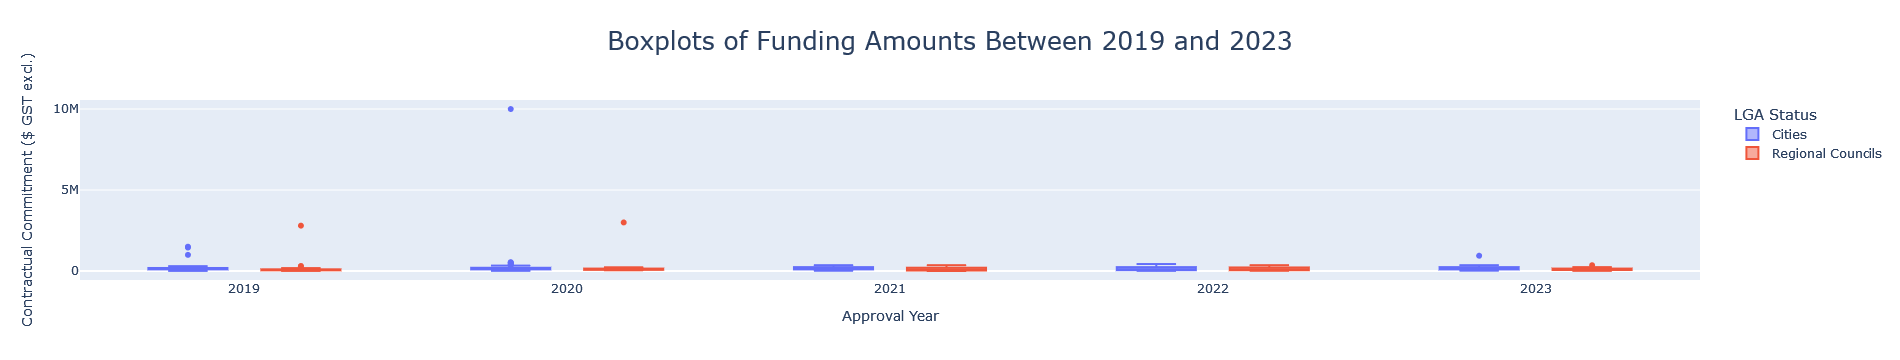

In [44]:
# Set up Boxplot
part_b_boxes1 = px.box(cleaned_df.reset_index(), 
                       x = "Approval Year", 
                       y="Contractual Commitment ($ GST excl.)", 
                       color = "LGA Status",
                       hover_name = "Program Name",
                       hover_data = ["Recipient Name", "Investment/Project Title"],
                       title = "Boxplots of Funding Amounts Between 2019 and 2023")

part_b_boxes1.update_layout(
    title_font_size=25,
    title_x=0.5,
    legend_title_font_size=15,
    height=500
)

This visualisation shows same the large outliers that were identified in the earlier analysis with more of these occuring in the earlier years. (Hover over to reveal the Project Name and other information). Using a boxplot though has the benefit of visualising exactly how much greater the outliers are than the rest of the distibuted grants.

In order to see the details of the box plots themselves it is necessary to zoom in to only grants under a certain funding value. This has been arbitarily chosen to hide grants over $500k as none in the top ten largest grants are below that number.

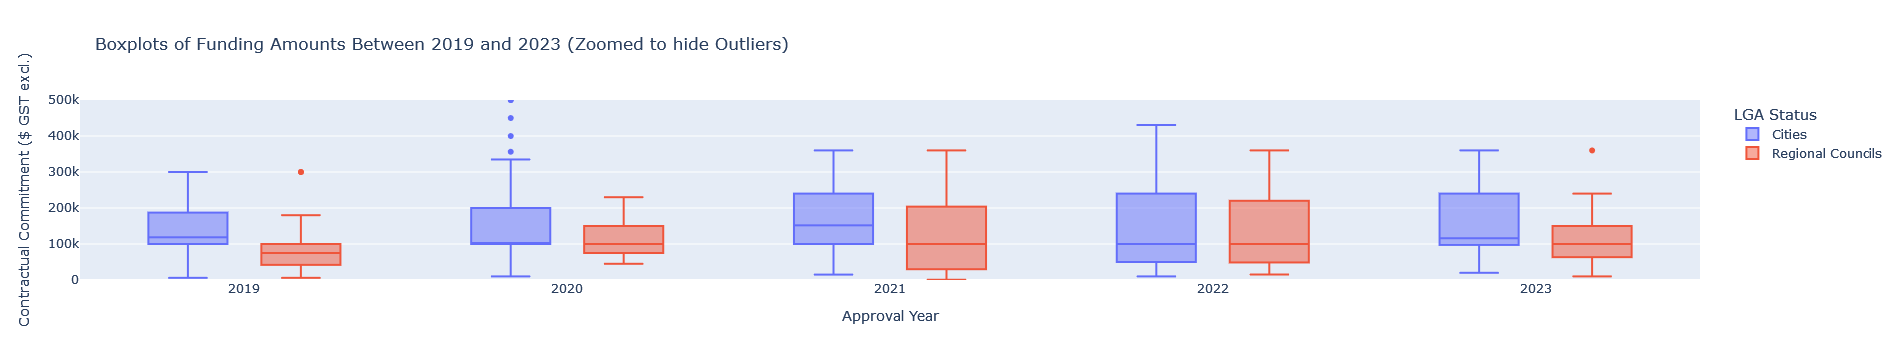

In [45]:
part_b_boxes1.update_yaxes(range=[0, 500000])
part_b_boxes1.update_layout(title = "Boxplots of Funding Amounts Between 2019 and 2023 (Zoomed to hide Outliers)")

## **Insight 2**
> What outlier grants exist and how much do they impact the funding allocations for city and regional recipients?

In the box plot view we can see that the median funding grants have remained stable over time for city and regional recipients, unlike the means which would be more affected by the outliers in 2019 and 2020. This stability suggests that **despite outliers having a significant impact on the total funding distribuition, the core offerings that Advance Queensland provide remain consistent**. It seems likely that the outliers are a result of one-off programs or even other government departments turning to Advance Queensland to distribute additonal funding. This hypothesis of external funding being distribuited by Advance Queensland is supported by the bar chart in the earlier visualisation 1b showing inconsistent annual funding allocations.

These outliers could be filtered out of the dataset and then total funding analysed again, but it would be preferable to form a better understanding of where projects are providing value across the state in a more accurate manner since the analysis showed multiple 

An additonal thing of note is that the boxplot don't exhibit any trend of increasing each year. This could provide an interesting avenue of whether government funding to the core programs for Advance Queensland are maintaining their value respective to inflation.

## **Conclusions**

From the investigation that was conducted it appears that Advance Queensland as a whole has done a suitable job balancing funding grants across core programs programs between regional and city areas.

More investigation could be done into individual programs and response to inflation, but would require detailed and time-consuming augmentation of the data set to understand the focus of individual programs and the finacial/health/environmental/societal benefits each funded project provides to the state of Queensland.

### **References**

Queensland Government Open Data Portal. (2024, July 1st) _Advance Queensland Funding Recipients_.

    Retrieved August 12, 2024, from https://www.data.qld.gov.au/dataset/advance-queensland-funding-recipients

Queensland Government Statistician's Office. (2024, April 4th) _Estimated Resident Populations_.

    Retrieved August 12, 2024, from https://www.qgso.qld.gov.au/statistics/theme/population/population-estimates/regions#current-release-estimated-resident-population